# Examen Módulo 1 - Optimización. <font color=blue>Tipo de examen 1</font>.
Lea cuidadosamente las siguientes **indicaciones** antes de comenzar el examen:
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *E1ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *E1ZapataCristian*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo.
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.
- Revise bien el tipo de examen. Sólo se le calificará si realiza el tipo de examen asignado.

## Primer punto. Optimización de funciones escalares usando `sympy` (30 puntos).

**Enunciado.** Un granjero tiene $2400$ m de cerca y desea cercar un campo rectangular de longitud $x$ y altura $y$ que limita con un río recto. No necesita cercar a lo largo del río. ¿Cuáles son las dimensiones
del campo que tiene el área más grande?

Ver la siguiente figura como ayuda

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

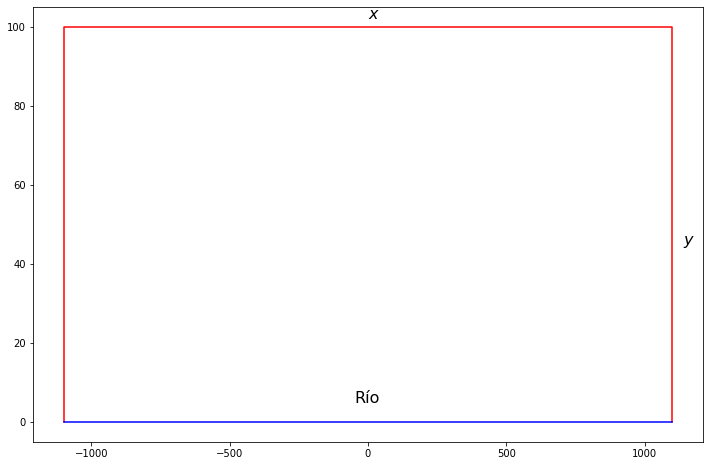

In [2]:
xr = [-1100, -1100, 1100, 1100]
yr = [0, 100, 100, 0]

xx = [-1100, 1100]
yx = [0, 0]

xy = [1100, 1100]
yy = [0, 100]

plt.figure(figsize = (12, 8))
plt.plot(xr, yr, 'r')
plt.plot(xx, yx, 'b')
#plt.plot(xy, yy, 'g')
plt.text(-50, 5, 'Río', fontsize = 16)
plt.text(1140, 45, '$y$', fontsize = 16, color = 'k')
plt.text(0, 102, '$x$', fontsize = 16, color = 'k')
plt.show()

**Punto 1 (10 puntos).** Encuentre el área del rectángulo en función de la variable $x$, $A_R(x)$. También provea el dominio de la función para que tenga sentido (Recuerde que las áreas no pueden ser negativas).

Realice este punto usando fórmulas en LaTeX, en celdas Markdown.

**Solución punto 1.**

El perimetro esta dado por:

$$2y + x = 2400$$

Mientras que el área esta dada por:

$$x*y = A$$

Por lo tanto, depejando para la variable y desde el perimetro, tenemos que:

$$y = \frac{24000}{2} - \frac {x}{2} $$


Y por lo tanto en el area, susituyendo la variable y encontrada:

$$A(x) = x(1200 - \frac{x}{2})$$
 Esta es la función a maximizar
 
 
 Mientras que su dominio esta dado en $$(0,2400)$$
 
 

**Punto 2 (15 puntos).** Usando `sympy` maximice la función $A_R(x)$ en su dominio.

**Solución punto 2.**

In [3]:
import sympy as sym
import numpy as np

In [4]:
#Definición de la variable x

sym.var('x')

x

In [5]:
#Definicion de la funcion a maximizar

def A(x):
    return 1200*x - x**2/2

A(x)

-x**2/2 + 1200*x

In [6]:
#Primera derivada de la funcion

dA = sym.diff (A(x),x)
dA

1200 - x

In [7]:
#Solución de a primera derivada para encontrar el punto crítico

xc = sym.solve(dA,x)

xc

[1200]

El punto crítico es $1200$, que ademas entra en el dominio de la función.

In [8]:
#Segunda derivada de la función

dA2 = sym.diff (A(x),x,2)
dA2

-1

Por lo tanto, dado que el criterio de la segunda derivada es negativo, el punto que se tiene corresponde a un máximo, falta comprobar que se trata de un máximo global.

In [9]:
#Evaluaciones de la función en los extremos y en xc

A(0), A(xc[0]), A(2400)

(0.0, 720000, 0.0)

Evaluando la función tanto en los extremos de su dominio, como en el punto crítico, podemos comprobar que el  punto crítico en efecto corresponde a un máximo global

**Punto 3 (5 puntos).** ¿Cuáles son las dimensiones $x$ y $y$ del rectángulo resultante?

**Solución punto 3.**

Las dimensiones del rectagulo son:

$$x = 1200 \;\;\; ; \;\;\; y = 600 $$

con un área total: 

$$A=720000m^2$$

---

## Segundo punto. Programación lineal (35 puntos).

**Enunciado.** Una compañía aérea dispone de dos tipos de aviones $A_1$, y $A_2$., para cubrir un determinado
trayecto. El avión $A_1$, debe hacer el trayecto más veces que el avión $A_2$ pero no puede sobrepasar $120$
viajes. Entre los dos aviones deben hacer más de $60$ vuelos, pero menos de $200$. En cada viaje del avión $A_1$ la empresa gana $\$30000$ y $\$20000$ por cada viaje del avión $A_2$. ¿Cuántos viajes debe hacer cada avión para obtener el máximo de ganancias?

*Definición de variables*: Sea $x_1$ la cantidad de viajes del avión $A_1$ y $x_2$ la cantidad de e viajes del avión $A_2$.

**Punto 1 (20 puntos).** Escriba la función a minimizar junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en LaTeX, en celdas Markdown). Además escriba el problema en la forma 
\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}
\end{equation}

proporcionando $\boldsymbol{c}$, $\boldsymbol{A}$ y $\boldsymbol{b}$ ($\boldsymbol{A}_{eq}$ y $\boldsymbol{b}_{eq}$, de ser necesario) como arreglos de `NumPy` (no es necesario escribir en LaTeX el problema en la forma indicada, solo proporcionar las matrices como arreglos de `NumPy`). Adicionalmente, si se requiere, recuerde escribir las cotas (límites superiores e inferiores) para cada una de las variables.

**Solución punto 1.**

La función objetivo es:

$$30000*x_1 + 20000*x_2$$


Las restricciones quedarian como sigue:

$$x_1>x_2$$

$$x_1 \leq 120$$

$$x_1+x_2 > 60$$

$$x_1 + x_2 < 200$$


Llevando a cabo los despejes y cambiando de signo las desigualdades que son $\geq$ o $>$, se obtienen las funciones para ingresarlas a las matrices:

$$-x_1 + x_2 < 0$$

$$x_1 \leq 120$$

$$-x_1 - x_2 < -60$$

$$x_1 + x_2 < 200$$

In [33]:
# Escriba acá las matrices como arreglos de Numpy

#Funcion objetivo

c = -np.array([30000,20000])


#Matrices de desigualdad (restricciones)

A = np.array([[-1,1],[1,0],[-1,-1],[1,1]])

b = np.array([0,120,-60,200])

**Punto 2 (15 puntos).** Resuelva el problema utilizando la función `linprog`. ¿Cuántos será la ganancia total?, ¿Cuántos viajes debe hacer cada avión?

In [34]:
import scipy.optimize as opt

In [35]:
#Solución del problema de optimización, mediante la función de linprog

sol = opt.linprog(c,A,b)
sol

     con: array([], dtype=float64)
     fun: -5199999.987158018
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([3.99999999e+01, 2.96189015e-07, 1.40000000e+02, 4.94004610e-07])
  status: 0
 success: True
       x: array([119.9999997,  79.9999998])

El avion $A_1$ debe realizar 120 viajes, mientras que el avion $A_2$ requiere de 80 viajes, obteniendo una ganancia total de $5,200,000$

**Nota: los valores fueron redondeados, el valor negativo se debe a que python solo puede minimizar y por tanto, se toma el valor como positivo (5,200,000).**

## Tercer punto. Ajuste de curvas (35 puntos).

**Enunciado**. El archivo `renewable_energy.csv` contiene información histórica anual de México relativa al consumo de energías de fuentes renovables en porcentaje desde el año 1990 hasta el año 2015. La primer columna corresponde al consecutivo, la segunda a los años, y la tercera al consumo.

Tomado de: https://data.worldbank.org/indicator/EG.FEC.RNEW.ZS?view=chart

**Punto 1 (10 puntos).** Importar los datos en un DataFrame de pandas.

**Solución punto 1.**

In [13]:
import pandas as pd

In [14]:
archivo = 'renewable_energy.csv'
data = pd.read_csv(archivo)
data

,Consecutivo,Year,% of total final energy consumption
0,1,1990,14.413302
1,2,1991,13.195512
2,3,1992,13.427092
3,4,1993,13.303969
4,5,1994,11.863103
5,6,1995,13.261833
6,7,1996,13.064724
7,8,1997,12.699777
8,9,1998,12.238453
9,10,1999,12.748461


**Punto 2 (15 puntos).** Usando el consecutivo como variable independiente $x$ y el consumo de energías renovables como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

Mostrar en un solo gráfico los datos de consumo contra los años, y los polinomios ajustados.

Graficar el error cuadrático acumulado contra el número de términos. ¿Cuál es el polinomio que mejor se ajusta?

**Solución punto 2.**

In [15]:
import numpy as np
import scipy.optimize  as opt
import matplotlib.pyplot as plt


In [16]:

#Definición de variable, mediante los datos de la tabla

x = data.iloc[:,0]
y = data.iloc[:,2]

In [17]:
def fun_obj(beta,x,y,n):
    return np.sum((y-beta.dot([x**i for i in range(n+1)]))**2)

In [18]:
#Generar los distintos ajustes de grado 1 hasta 3, junto a sus betas iniciales

b01 = np.zeros(2)
ajuste1 = opt.minimize(fun_obj, b01, args=(x,y,1))
b02 = np.zeros(3)
ajuste2 = opt.minimize(fun_obj, b02, args=(x,y,2))
b03 = np.zeros(4)
ajuste3 = opt.minimize(fun_obj, b03, args=(x,y,3))

In [19]:
ajuste1

      fun: 8.127439608947885
 hess_inv: array([[ 0.081543  , -0.00461618],
       [-0.00461618,  0.00034202]])
      jac: array([-1.19209290e-07, -1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([14.00697767, -0.21443891])

In [20]:
ajuste2

      fun: 6.773933447387343
 hess_inv: array([[ 2.02692325e-01, -3.05769267e-02,  9.61538588e-04],
       [-3.05769267e-02,  5.90506783e-03, -2.06043979e-04],
       [ 9.61538588e-04, -2.06043979e-04,  7.63125843e-06]])
      jac: array([ 0.00000000e+00, -5.96046448e-08,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 40
      nit: 5
     njev: 8
   status: 0
  success: True
        x: array([ 1.45796249e+01, -3.37149024e-01,  4.54481905e-03])

In [21]:
ajuste3

      fun: 4.722277479350717
 hess_inv: array([[ 4.16555249e-01, -1.17530679e-01,  8.86287794e-03,
        -1.95094799e-04],
       [-1.17530679e-01,  4.12592791e-02, -3.41862094e-03,
         7.93228880e-05],
       [ 8.86287794e-03, -3.41862094e-03,  2.99552663e-04,
        -7.20793605e-06],
       [-1.95094799e-04,  7.93228880e-05, -7.20793605e-06,
         1.77973736e-07]])
      jac: array([5.96046448e-08, 0.00000000e+00, 5.96046448e-08, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 54
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([ 1.36463465e+01,  4.23092405e-02, -2.99359071e-02,  8.51375954e-04])

In [22]:

xpoints = x
ypoints = y

yhat1 = (ajuste1.x[0]+ajuste1.x[1]*xpoints)

yhat2 = (ajuste2.x[0]+ajuste2.x[1]*xpoints+ajuste2.x[2]*(xpoints**2))

yhat3 = (ajuste3.x[0]+ajuste3.x[1]*xpoints+ajuste3.x[2]*(xpoints**2)+ajuste3.x[3]*(xpoints**3))

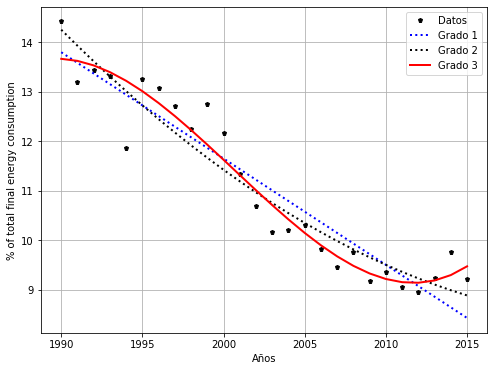

In [26]:
#Crear la figura

plt.figure(figsize=(8,6))

#Graficar los datos

plt.plot(xpoints+1989, ypoints, 'pk', ms=5, label='Datos')
plt.plot(xpoints+1989, yhat1, ':b', lw=2, label='Grado 1')
plt.plot(xpoints+1989, yhat2, ':k', lw=2, label='Grado 2')
plt.plot(xpoints+1989, yhat3, 'r', lw=2, label='Grado 3')

#Mostrar las etiquetas, los ejes, el  mallado y la figura

plt.grid()
plt.xlabel('Años')
plt.ylabel('% of total final energy consumption')
plt.legend(loc = 'best')


plt.show()

**Punto 3 (10 puntos).** Con los polinomios ajustados en el punto anterior, estime el consumo en el año 2015 y compare con el dato real $9.215\%$.

¿Cuál polinomio estima mejor este dato? ¿Es el polinomio que mejor se ajusta? Concluya.

In [32]:
#Evaluacion de las distintas funciones ajustadas.

yhat1[25],yhat2[25],yhat3[25], data.iloc[25,2]

(8.43156603350928, 8.886047940631927, 9.473497346116204, 9.215213455)

**Solución punto 3.**

El polinomio que mas se acerca al valor real y por tanto que produce el mejor ajuste es el de orden orden 3, con un valor estimado de 9.4734, contra el valor real de 9.215

Como dato adicional, el porcentaje de error entre las mediciones se puede tomar como sigue:

$$ e_r = \frac{(valor \; real)-(valor\; medido)}{valor\; real}*100$$


$$e_r = \frac{|(0.09215)-(0.09473)|}{0.09215}*100 =  2.72\% $$


Por lo tanto el error no es tan relevante para el polinomio de grado 3 y este puede ser utilizado para predecir valores futuros.
